In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [410]:
df=pd.read_csv('/content/drive/MyDrive/Data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [412]:
df['date_added']=pd.to_datetime(df['date_added'],format='%B %d, %Y',errors='coerce')


In [413]:
df=df.fillna({
    'director':'unknown',
    'cast':'unknown',
    'country':'unknown',
})
df=df.dropna(subset=['date_added','rating'])
df.drop(['show_id','duration','description','title'],axis=1,inplace=True)

In [414]:
df.describe(include='all')

,type,director,cast,country,date_added,release_year,rating,listed_in
count,8705,8705,8705,8705,8705,8705.000000,8705,8705
unique,2,4524,7603,746,NaN,NaN,17,509
top,Movie,unknown,unknown,United States,NaN,NaN,TV-MA,"Dramas, International Movies"
freq,6129,2538,817,2778,NaN,NaN,3183,362
mean,NaN,NaN,NaN,NaN,2019-05-23 10:08:15.439402496,2014.196669,NaN,NaN
min,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2018-04-20 00:00:00,2013.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2019-07-12 00:00:00,2017.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2020-08-26 00:00:00,2019.000000,NaN,NaN
max,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN


In [415]:
df.shape

(8705, 8)

In [416]:
df.duplicated().sum()

33

# **EDA**

In [417]:
for col in df.columns:
  print(df[col].value_counts())
  print('************************************************************')

type
Movie      6129
TV Show    2576
Name: count, dtype: int64
************************************************************
director
unknown                           2538
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4524, dtype: int64
************************************************************
cast
unknown                                                                                                                                                              817
David Attenborough                                                                                                                                                 

In [418]:
count_type=df['type'].value_counts().reset_index()
count_type.set_index('type')

,count
type,
Movie,6129
TV Show,2576


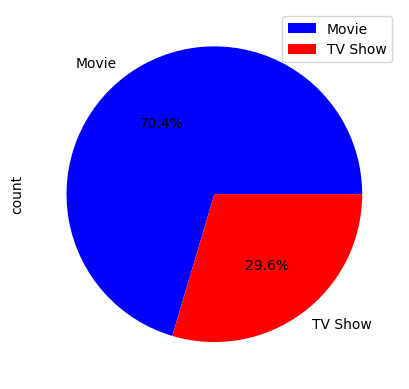

In [419]:
count_type.plot(kind='pie',labels=count_type['type'],y='count',autopct='%1.1f%%',colors=['blue','red'])
plt.show()

In [420]:
df=df.drop(df[df['director']=='unknown'].index)

In [421]:
director_new=df['director'].value_counts().reset_index().head(10)
director_new

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Martin Scorsese,12
8,Youssef Chahine,12
9,Steven Spielberg,11


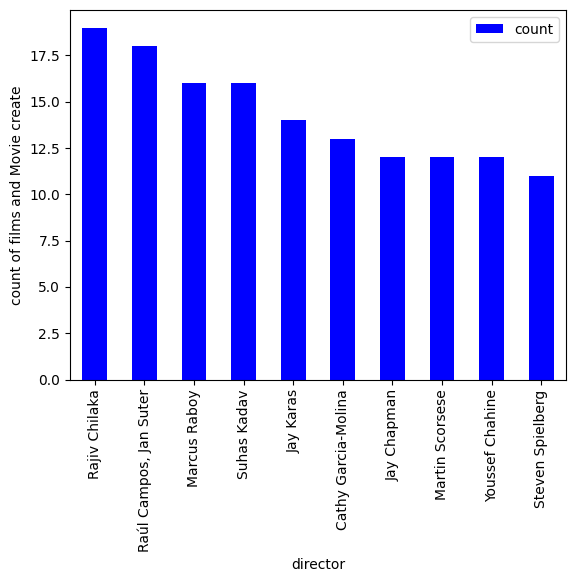

In [422]:

director_new.plot(kind='bar',x='director',y='count',color='blue')
plt.ylabel('count of films and Movie create')
plt.show()

In [423]:
df=df.drop(df[df['country']=='unknown'].index)
top_country=df['country'].value_counts().reset_index().head(10)
top_country

,country,count
0,United States,2045
1,India,890
2,United Kingdom,211
3,Canada,119
4,Spain,106
5,Nigeria,90
6,Egypt,90
7,Japan,85
8,France,81
9,Turkey,79


<ipython-input-424-41a3912d4498>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




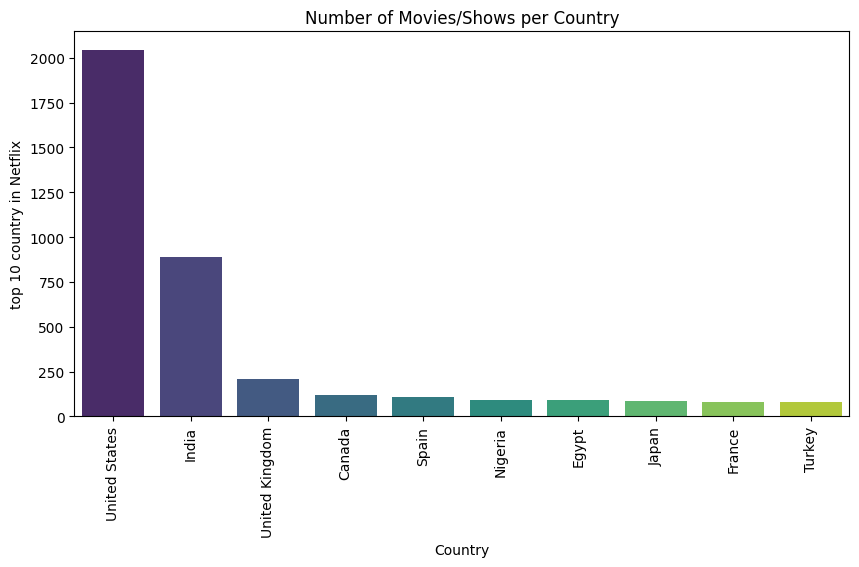

In [424]:
plt.figure(figsize=(10,5))
sns.barplot(x='country', y='count', data=top_country, palette='viridis')

plt.xlabel("Country")
plt.ylabel("top 10 country in Netflix")
plt.title("Number of Movies/Shows per Country")
plt.xticks(rotation=90)
plt.show()

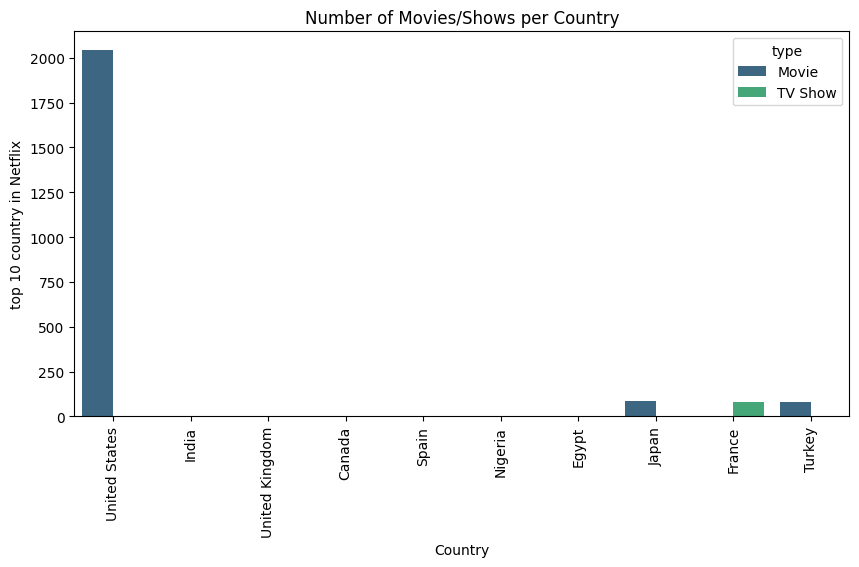

In [425]:
plt.figure(figsize=(10,5))
sns.barplot(x='country', y='count', data=top_country, hue=df['type'],palette='viridis')

plt.xlabel("Country")
plt.ylabel("top 10 country in Netflix")
plt.title("Number of Movies/Shows per Country")
plt.xticks(rotation=90)
plt.show()

In [426]:
top_10_days=df['date_added'].value_counts().reset_index().head(10)
top_10_days

,date_added,count
0,2020-01-01,93
1,2019-11-01,70
2,2018-03-01,69
3,2019-12-31,64
4,2018-10-01,61
5,2018-11-01,52
6,2019-10-01,51
7,2018-01-01,48
8,2021-07-01,48
9,2021-09-01,45


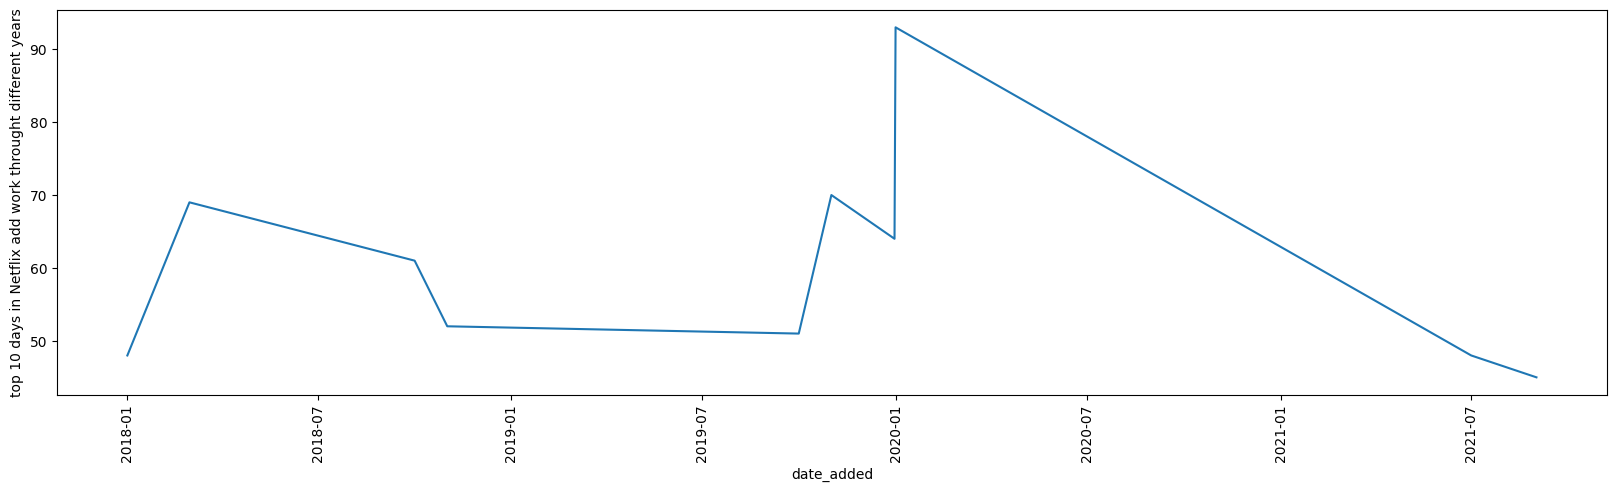

In [427]:
plt.figure(figsize=(20,5))
sns.lineplot(data=top_10_days,x='date_added',y='count')
plt.ylabel('top 10 days in Netflix add work throught different years')
plt.xticks(rotation=90)
plt.show()

In [428]:
df['year']=df['date_added'].dt.year
top_10_years_add_work=df['year'].value_counts().reset_index().head(10)
top_10_years_add_work

,year,count
0,2019,1351
1,2020,1256
2,2018,1173
3,2017,827
4,2021,797
5,2016,240
6,2015,56
7,2014,18
8,2011,13
9,2013,7


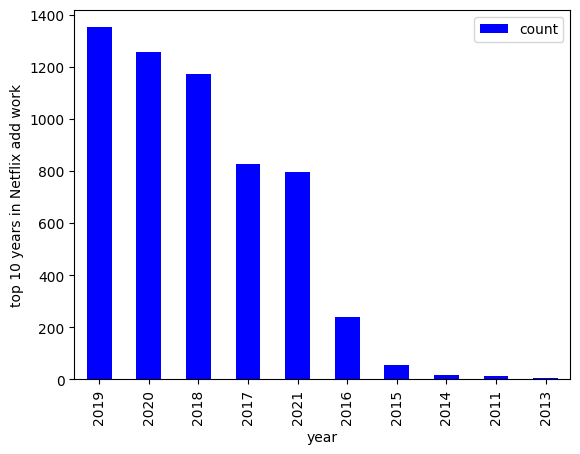

In [429]:
top_10_years_add_work.plot(kind='bar',x='year',y='count',color='blue')
plt.ylabel('top 10 years in Netflix add work')
plt.show()

In [430]:
df.columns

Index(['type', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'listed_in', 'year'],
      dtype='object')

In [431]:
top_years_rating = df.groupby(['year', 'rating']).size().reset_index(name='count')
top_3_rating_per_year = top_years_rating.sort_values(['year', 'count'], ascending=[True, False]).groupby('year').head(3)  # يعرض أعلى 3 تقييمات لكل سنة
print(top_3_rating_per_year)


    year rating  count
0   2008  TV-MA      1
1   2009  TV-MA      2
2   2010     NR      1
3   2011  TV-14      5
5   2011  TV-PG      5
4   2011  TV-MA      3
6   2012     PG      1
7   2012      R      1
8   2012  TV-PG      1
9   2013     NR      3
12  2013  TV-MA      2
10  2013     PG      1
16  2014  TV-MA      8
14  2014     PG      3
17  2014  TV-PG      3
26  2015  TV-MA     24
24  2015  TV-14      8
20  2015     NR      5
41  2016  TV-MA    107
39  2016  TV-14     39
42  2016  TV-PG     28
54  2017  TV-MA    354
52  2017  TV-14    189
55  2017  TV-PG     98
67  2018  TV-MA    428
65  2018  TV-14    340
64  2018      R    129
78  2019  TV-MA    448
76  2019  TV-14    313
75  2019      R    205
89  2020  TV-MA    393
87  2020  TV-14    294
86  2020      R    187
99  2021  TV-MA    209
96  2021      R    180
95  2021  PG-13    141


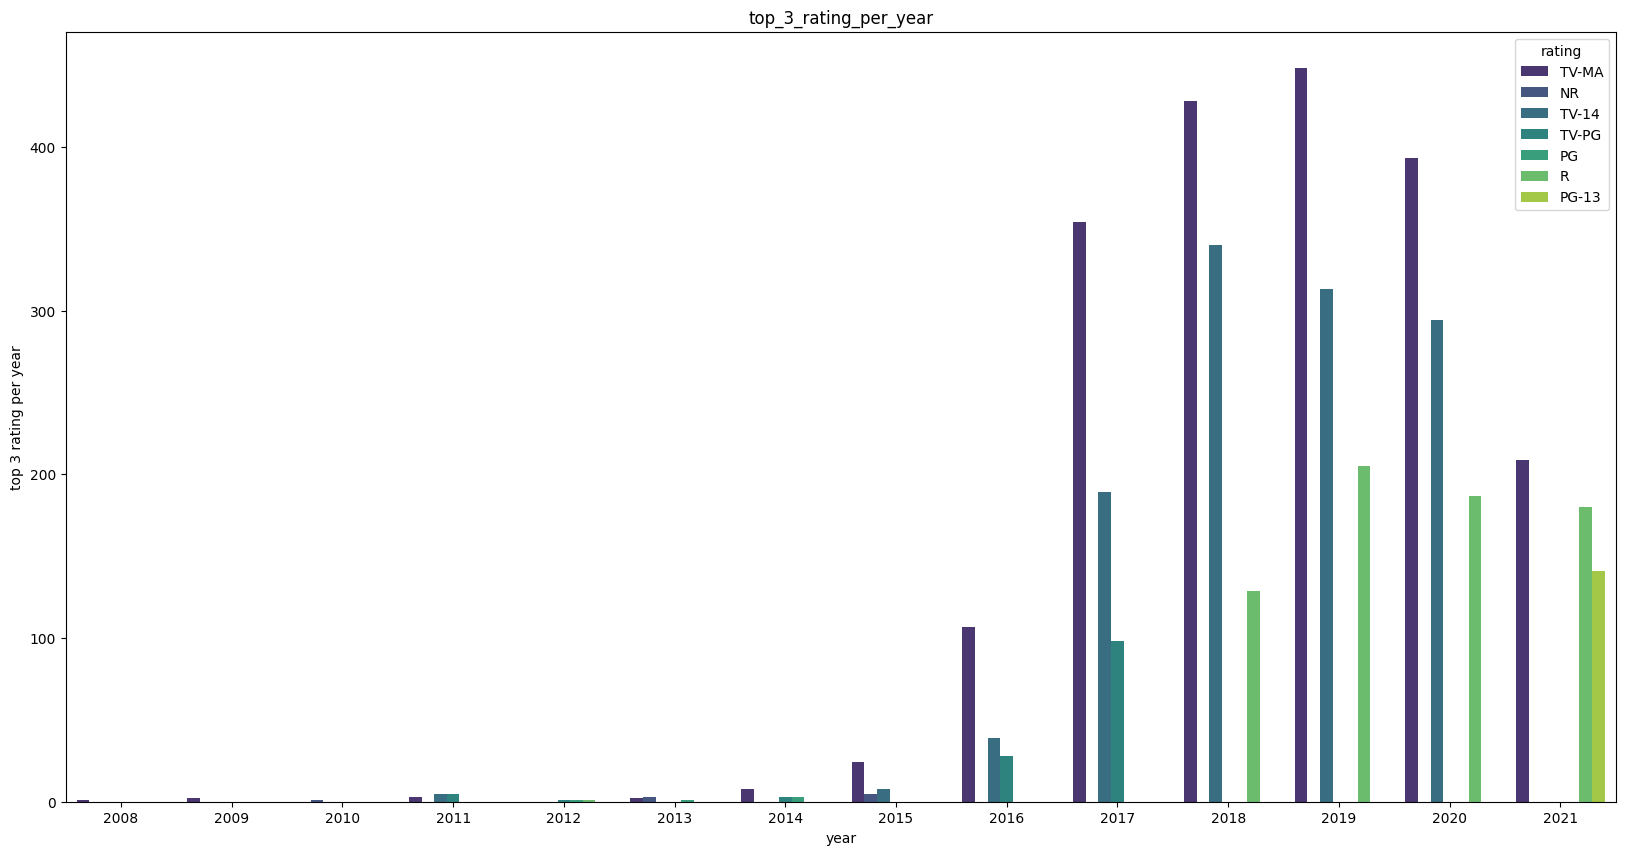

In [432]:
plt.figure(figsize=(20,10))
sns.barplot(data=top_3_rating_per_year,x='year',y='count',hue='rating',palette='viridis')
plt.xlabel('year')
plt.ylabel('top 3 rating per year')
plt.title('top_3_rating_per_year')
plt.show()

In [433]:
type_of_watch=df['type'].value_counts().reset_index()
type_of_watch

,type,count
0,Movie,5561
1,TV Show,184


<ipython-input-434-e10591c1caac>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'type of watch')

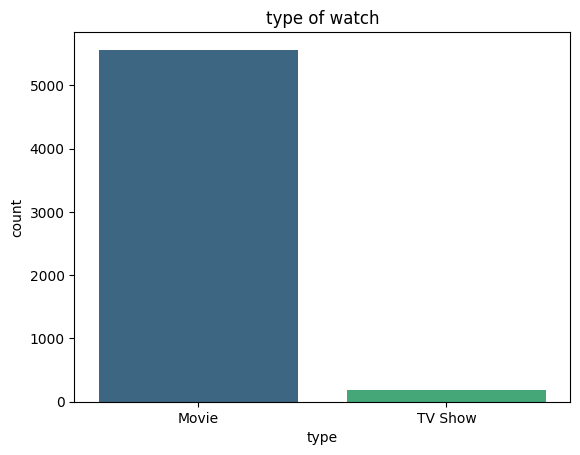

In [434]:
sns.barplot(data=type_of_watch,x='type',y='count',palette='viridis')
plt.xlabel('type')
plt.ylabel('count')
plt.title('type of watch')

In [435]:
rating_with_type_movie=df.groupby(['rating','type']).size().reset_index(name='count').sort_values('count',ascending=False)
rating_with_type_movie

,rating,type,count
13,TV-MA,Movie,1876
9,TV-14,Movie,1282
8,R,Movie,784
15,TV-PG,Movie,485
7,PG-13,Movie,481
6,PG,Movie,281
14,TV-MA,TV Show,103
11,TV-G,Movie,99
5,NR,Movie,75
19,TV-Y7,Movie,73


Text(0.5, 1.0, 'rating with type movie')

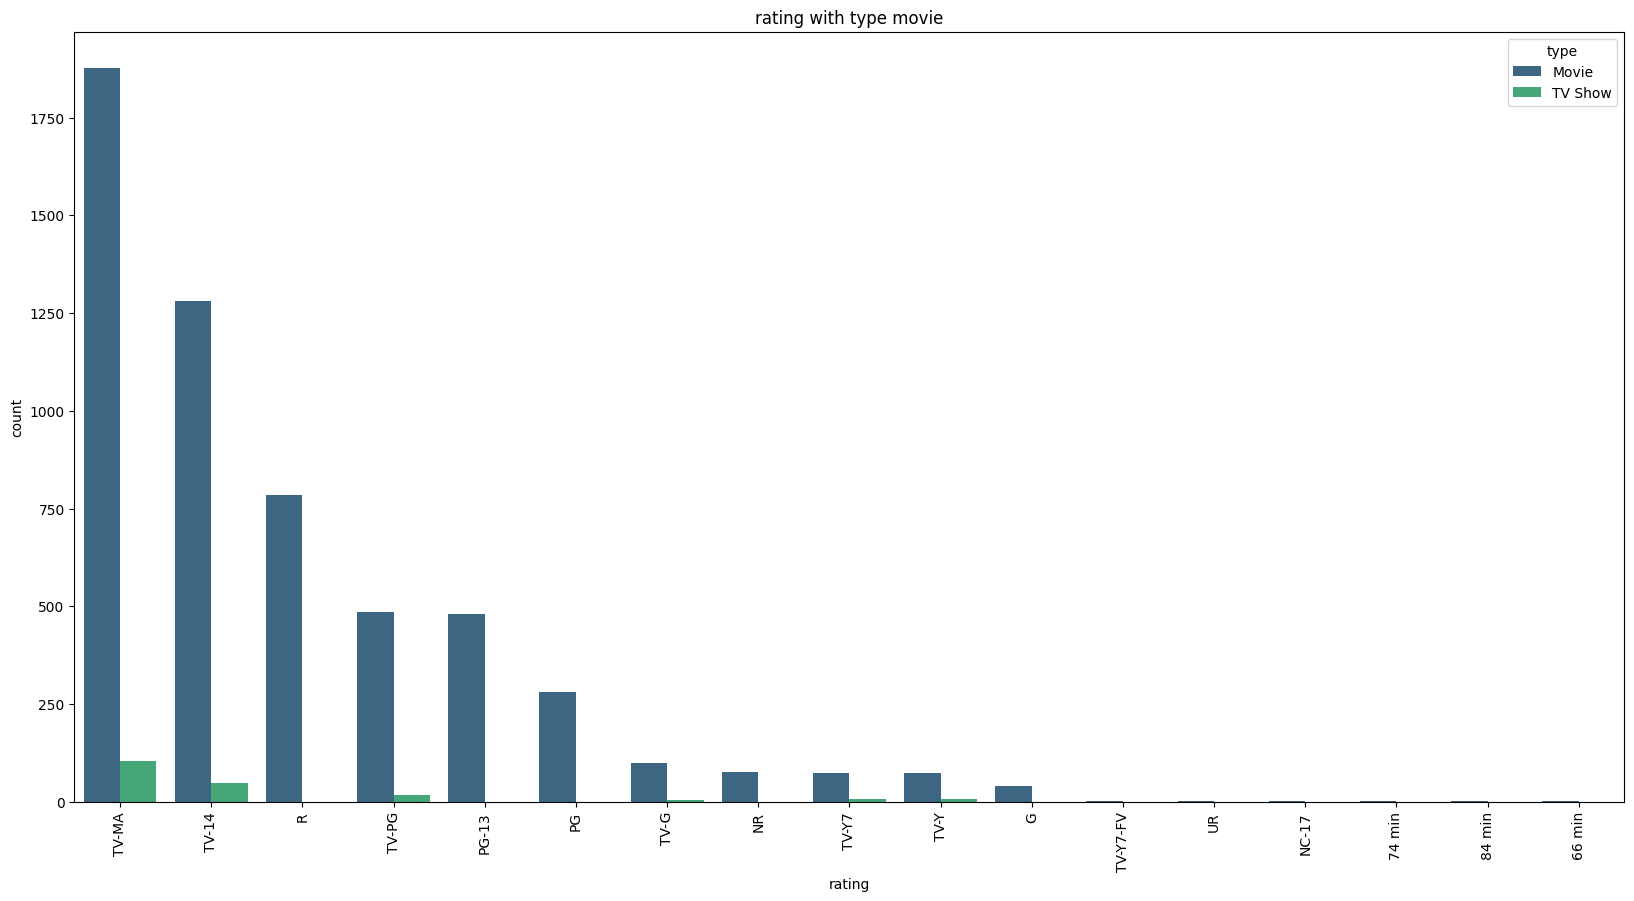

In [436]:
plt.figure(figsize=(20,10))
sns.barplot(data=rating_with_type_movie,x='rating',y='count',hue='type',palette='viridis')
plt.xlabel('rating')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('rating with type movie')

In [437]:
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",336
Documentaries,323
Stand-Up Comedy,286
"Comedies, Dramas, International Movies",257
"Dramas, Independent Movies, International Movies",243
...,...
"International TV Shows, Stand-Up Comedy & Talk Shows, TV Comedies",1
"International TV Shows, Spanish-Language TV Shows, TV Comedies",1
"International TV Shows, TV Action & Adventure, TV Comedies",1


In [438]:
df[['type_list1','type_list2','type_list3']]=df['listed_in'].str.split(',',expand=True)

In [439]:
df[['type_list1','type_list2','type_list3']]

,type_list1,type_list2,type_list3
0,Documentaries,None,None
7,Dramas,Independent Movies,International Movies
8,British TV Shows,Reality TV,None
9,Comedies,Dramas,None
12,Dramas,International Movies,None
...,...,...,...
8801,Dramas,International Movies,Thrillers
8802,Cult Movies,Dramas,Thrillers
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [440]:
data_new_list=df[['type_list1','type_list2','type_list3']]
data_new_list

,type_list1,type_list2,type_list3
0,Documentaries,None,None
7,Dramas,Independent Movies,International Movies
8,British TV Shows,Reality TV,None
9,Comedies,Dramas,None
12,Dramas,International Movies,None
...,...,...,...
8801,Dramas,International Movies,Thrillers
8802,Cult Movies,Dramas,Thrillers
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [441]:
for col in data_new_list.columns:
  print(data_new_list[col].value_counts())
  print('************************************************************')


type_list1
Dramas                          1519
Comedies                        1128
Action & Adventure               809
Documentaries                    720
Children & Family Movies         479
Stand-Up Comedy                  286
Horror Movies                    261
International Movies             110
Classic Movies                    80
Thrillers                         62
Crime TV Shows                    52
International TV Shows            47
Movies                            24
British TV Shows                  22
Independent Movies                20
Anime Features                    19
Docuseries                        17
Music & Musicals                  15
Kids' TV                          13
Sci-Fi & Fantasy                  13
Cult Movies                       12
Anime Series                      10
TV Shows                           7
Stand-Up Comedy & Talk Shows       7
Romantic Movies                    3
TV Action & Adventure              2
TV Comedies                

In [442]:
df.columns

Index(['type', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'listed_in', 'year', 'type_list1', 'type_list2',
       'type_list3'],
      dtype='object')

In [443]:
data_new_list=data_new_list.groupby(['type_list1','type_list2','type_list3']).size().reset_index(name='count')

In [444]:
data_new_list=data_new_list.sort_values('count',ascending=False)
data_new_list

,type_list1,type_list2,type_list3,count
119,Comedies,Dramas,International Movies,257
177,Dramas,Independent Movies,International Movies,243
186,Dramas,International Movies,Romantic Movies,160
136,Comedies,International Movies,Romantic Movies,144
189,Dramas,International Movies,Thrillers,125
...,...,...,...,...
90,Classic & Cult TV,TV Action & Adventure,TV Horror,1
160,Cult Movies,Independent Movies,Thrillers,1
159,Cult Movies,Horror Movies,Thrillers,1
157,Cult Movies,Dramas,Thrillers,1


In [445]:

data_new_list = data_new_list.groupby(['type_list1', 'type_list2', 'type_list3']).size().reset_index(name='count')


data_new_list = data_new_list.sort_values('count', ascending=False)

melted_df = data_new_list.melt(id_vars=['count'], value_vars=['type_list1', 'type_list2', 'type_list3'], value_name='type')


final_count = melted_df.groupby('type', as_index=False)['count'].sum()


final_count = final_count.sort_values(by='count', ascending=False)


print(final_count.head(10))



                     type  count
36     Action & Adventure     51
13   International Movies     51
9                  Dramas     38
43               Comedies     35
12     Independent Movies     31
22       Sci-Fi & Fantasy     31
20        Romantic Movies     29
4                Comedies     28
48                 Dramas     26
18       Music & Musicals     25


<ipython-input-446-ec4dd8b769aa>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'top ten count of kind in netflix')

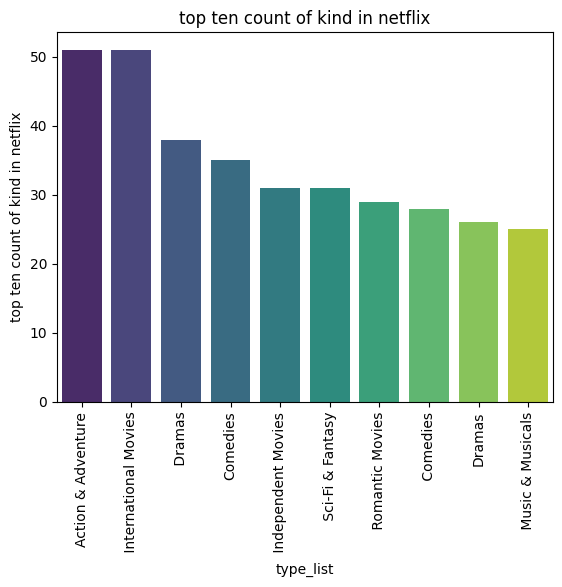

In [446]:
sns.barplot(data=final_count.head(10),x='type',y='count',palette='viridis')
plt.xlabel('type_list')
plt.ylabel('top ten count of kind in netflix')
plt.xticks(rotation=90)
plt.title('top ten count of kind in netflix')

In [447]:
df.columns

Index(['type', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'listed_in', 'year', 'type_list1', 'type_list2',
       'type_list3'],
      dtype='object')

In [448]:
groub_of_list=df.groupby(['listed_in','type']).size().reset_index(name='count')
groub_of_list=groub_of_list.sort_values('count',ascending=False)
top_10_type_with_listedin=groub_of_list.head(10)

In [449]:
top_10_type_with_listedin

,listed_in,type,count
251,"Dramas, International Movies",Movie,336
214,Documentaries,Movie,323
333,Stand-Up Comedy,Movie,286
161,"Comedies, Dramas, International Movies",Movie,257
244,"Dramas, Independent Movies, International Movies",Movie,243
98,"Children & Family Movies, Comedies",Movie,179
254,"Dramas, International Movies, Romantic Movies",Movie,160
221,"Documentaries, International Movies",Movie,159
178,"Comedies, International Movies",Movie,152
181,"Comedies, International Movies, Romantic Movies",Movie,144


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Dramas, International Movies'),
  Text(1, 0, 'Documentaries'),
  Text(2, 0, 'Stand-Up Comedy'),
  Text(3, 0, 'Comedies, Dramas, International Movies'),
  Text(4, 0, 'Dramas, Independent Movies, International Movies'),
  Text(5, 0, 'Children & Family Movies, Comedies'),
  Text(6, 0, 'Dramas, International Movies, Romantic Movies'),
  Text(7, 0, 'Documentaries, International Movies'),
  Text(8, 0, 'Comedies, International Movies'),
  Text(9, 0, 'Comedies, International Movies, Romantic Movies')])

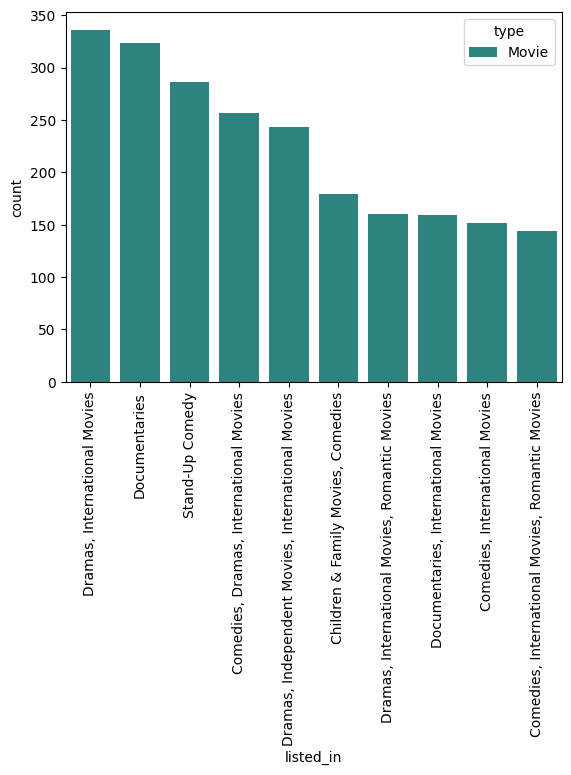

In [450]:
sns.barplot(data=top_10_type_with_listedin,x='listed_in',y='count',hue='type',palette='viridis')
plt.xlabel('listed_in')
plt.ylabel('count')
plt.xticks(rotation=90)

In [451]:
df_rate_with_listedin=df.groupby(['listed_in','rating']).size().reset_index(name='count')
df_rate_with_listedin=df_rate_with_listedin.sort_values('count',ascending=False)
df_rate_with_listedin.head(10)

,listed_in,rating,count
840,Stand-Up Comedy,TV-MA,242
627,"Dramas, International Movies",TV-MA,144
598,"Dramas, Independent Movies, International Movies",TV-MA,138
366,"Comedies, Dramas, International Movies",TV-14,127
625,"Dramas, International Movies",TV-14,124
495,Documentaries,TV-MA,104
203,"Children & Family Movies, Comedies",PG,98
1,Action & Adventure,R,86
368,"Comedies, Dramas, International Movies",TV-MA,85
641,"Dramas, International Movies, Romantic Movies",TV-14,85


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Stand-Up Comedy'),
  Text(1, 0, 'Dramas, International Movies'),
  Text(2, 0, 'Dramas, Independent Movies, International Movies'),
  Text(3, 0, 'Comedies, Dramas, International Movies'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Children & Family Movies, Comedies'),
  Text(6, 0, 'Action & Adventure'),
  Text(7, 0, 'Dramas, International Movies, Romantic Movies')])

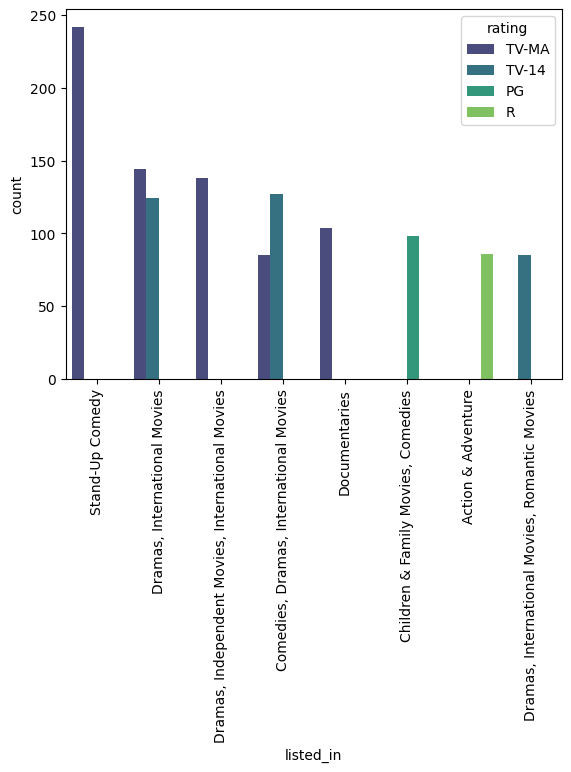

In [452]:
sns.barplot(data=df_rate_with_listedin.head(10),x='listed_in',y='count',hue='rating',palette='viridis')
plt.xlabel('listed_in')
plt.ylabel('count')
plt.xticks(rotation=90)